In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [23]:
data = unp.uarray([13.4, 13.6, 17.7, 42.0, 24.8, 30.4, 27.1, 24.6, 22.8, 8.75, 29.9, 41.3, 51.5, 56.3, 27.7, 34.2, 50.3], 17*[0.001]) * 1e-6


# Constants
q_0_theor = 1.6022e-19
g = 9.807
p = 102e5
T = 273.15 + 23
M_zr = 28.96 # kg/kmol
R = 8314 # J/K kmol 
rho_zr = p*M_zr / (R*T)
nu_zr = 18.3e-6

rho = 973
d = unp.uarray([5e-3], [0.1e-3])
U = 154

In [27]:
r1 = unp.sqrt(( 9 * nu_zr * data ) / (2 * (rho - rho_zr) * g))

E = U / d

q1 = (4 * np.pi * r1 ** 3 * (rho - rho_zr) * g) / (3 * E)

print(q1 / q_0_theor)

[0.3401917923286724+/-0.006803942416179465
 0.3478363749687031+/-0.006956833282501959
 0.5164479208459203+/-0.01032905114271608
 1.8877330064734616+/-0.037754720324989055
 0.8565331088269705+/-0.017130740512708135
 1.1624573002691887+/-0.023249216759499564
 0.978409295502556+/-0.01956826084832469
 0.8461927390757483+/-0.01692393343547585
 0.7550381646358446+/-0.01510084499243579
 0.17950589413065293+/-0.0035902497620722293
 1.133896504004121+/-0.022678001423331404
 1.8407368698281046+/-0.036814798100068345
 2.563170389694793+/-0.051263462154630325
 2.9297409816491373+/-0.05859487162477284
 1.0110817871287365+/-0.0202217098648053
 1.3870936797640037+/-0.027741940302921472
 2.474107759701561+/-0.04948221019938049]


In [28]:
U2 = 138

E2 = U2/d

v_p = unp.uarray([70.1, 67.8, 73.0, 68.7, 59.7, 72.0, 63.7, 67.5, 65.67, 70.5, 72.8, 99.6, 103.4, 106.1, ], 14 * [0.001]) * 1e-6

v_m = unp.uarray([23.8, 26.4, 34.2, 29.2, 14.5, 56.8, 23.0, 4.6, 26.37, 0.7, 1.2, 37.4, 39.2, 18.0], 14 * [0.001]) * 1e-6



r2 = unp.sqrt(9 * nu_zr * (v_p - v_m) / (4 * g * (rho - rho_zr)))

q2 = 3 * np.pi * r2 * nu_zr * (v_p - v_m) / E2

print(q2 / q_0_theor)

[0.8620545754721208+/-0.017241136749664886
 0.7288930116993972+/-0.014577908076603445
 0.6613187910384536+/-0.01322642524035737
 0.6792957824413343+/-0.013585964628565686
 0.8315166062670305+/-0.01663037791274048
 0.16215436978392686+/-0.003243166352329065
 0.7104849594209925+/-0.01420974744070162
 1.3650207175463485+/-0.027300453165084643
 0.6741431101323169+/-0.013482911306856651
 1.5956822301763487+/-0.031913681449313815
 1.657802568641067+/-0.03315608775251585
 1.3422977177671447+/-0.026845993387296523
 1.407556435778415+/-0.028151167134739054
 2.262700836271083+/-0.04525404952193577]


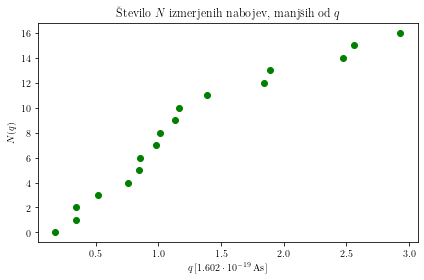

In [32]:
N = np.arange(len(q1))
q1.sort()

fig, ax = plt.subplots(1, 1)

ax.plot(unp.nominal_values(q1) / q_0_theor, N, color='green', linestyle='', marker='o')

ax.set_title(f'Število $N$ izmerjenih nabojev, manjših od $q$')
ax.set_xlabel(r'$q\,[1.602 \cdot 10^{-19}\,\mathrm{As}]$')
ax.set_ylabel(r'$N(q)$')
#ax.set_ylim(0, 15)
#ax.grid(which='both', linestyle=':', axis='both')
#ax.legend()
fig.tight_layout()
fig.savefig(f'1metoda.pdf')

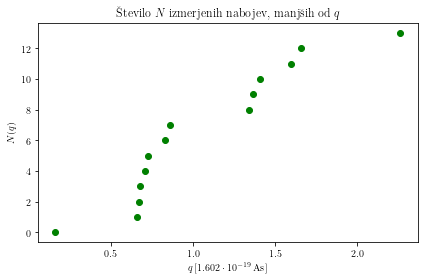

In [33]:
N = np.arange(len(q2))
q2.sort()

fig, ax = plt.subplots(1, 1)

ax.plot(unp.nominal_values(q2) / q_0_theor, N, color='green', linestyle='', marker='o')

ax.set_title(f'Število $N$ izmerjenih nabojev, manjših od $q$')
ax.set_xlabel(r'$q\,[1.602 \cdot 10^{-19}\,\mathrm{As}]$')
ax.set_ylabel(r'$N(q)$')
#ax.set_ylim(0, 15)
#ax.grid(which='both', linestyle=':', axis='both')
#ax.legend()
fig.tight_layout()
fig.savefig(f'2metoda.pdf')